In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# Découverte et préparation des données

## Organisation des données

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Projet_IA_A3/stat_finale.csv')

## Découverte des données

FEATURES :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73643 entries, 0 to 73642
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_Acc                   73643 non-null  int64  
 1   num_veh                   73643 non-null  float64
 2   id_usa                    73643 non-null  int64  
 3   date                      73643 non-null  int64  
 4   ville                     73643 non-null  float64
 5   id_code_insee             73643 non-null  int64  
 6   latitude                  73643 non-null  float64
 7   longitude                 73643 non-null  float64
 8   descr_cat_veh             73643 non-null  int64  
 9   descr_agglo               73643 non-null  int64  
 10  descr_athmo               73643 non-null  int64  
 11  descr_lum                 73643 non-null  int64  
 12  descr_etat_surf           73643 non-null  int64  
 13  description_intersection  73643 non-null  int64  


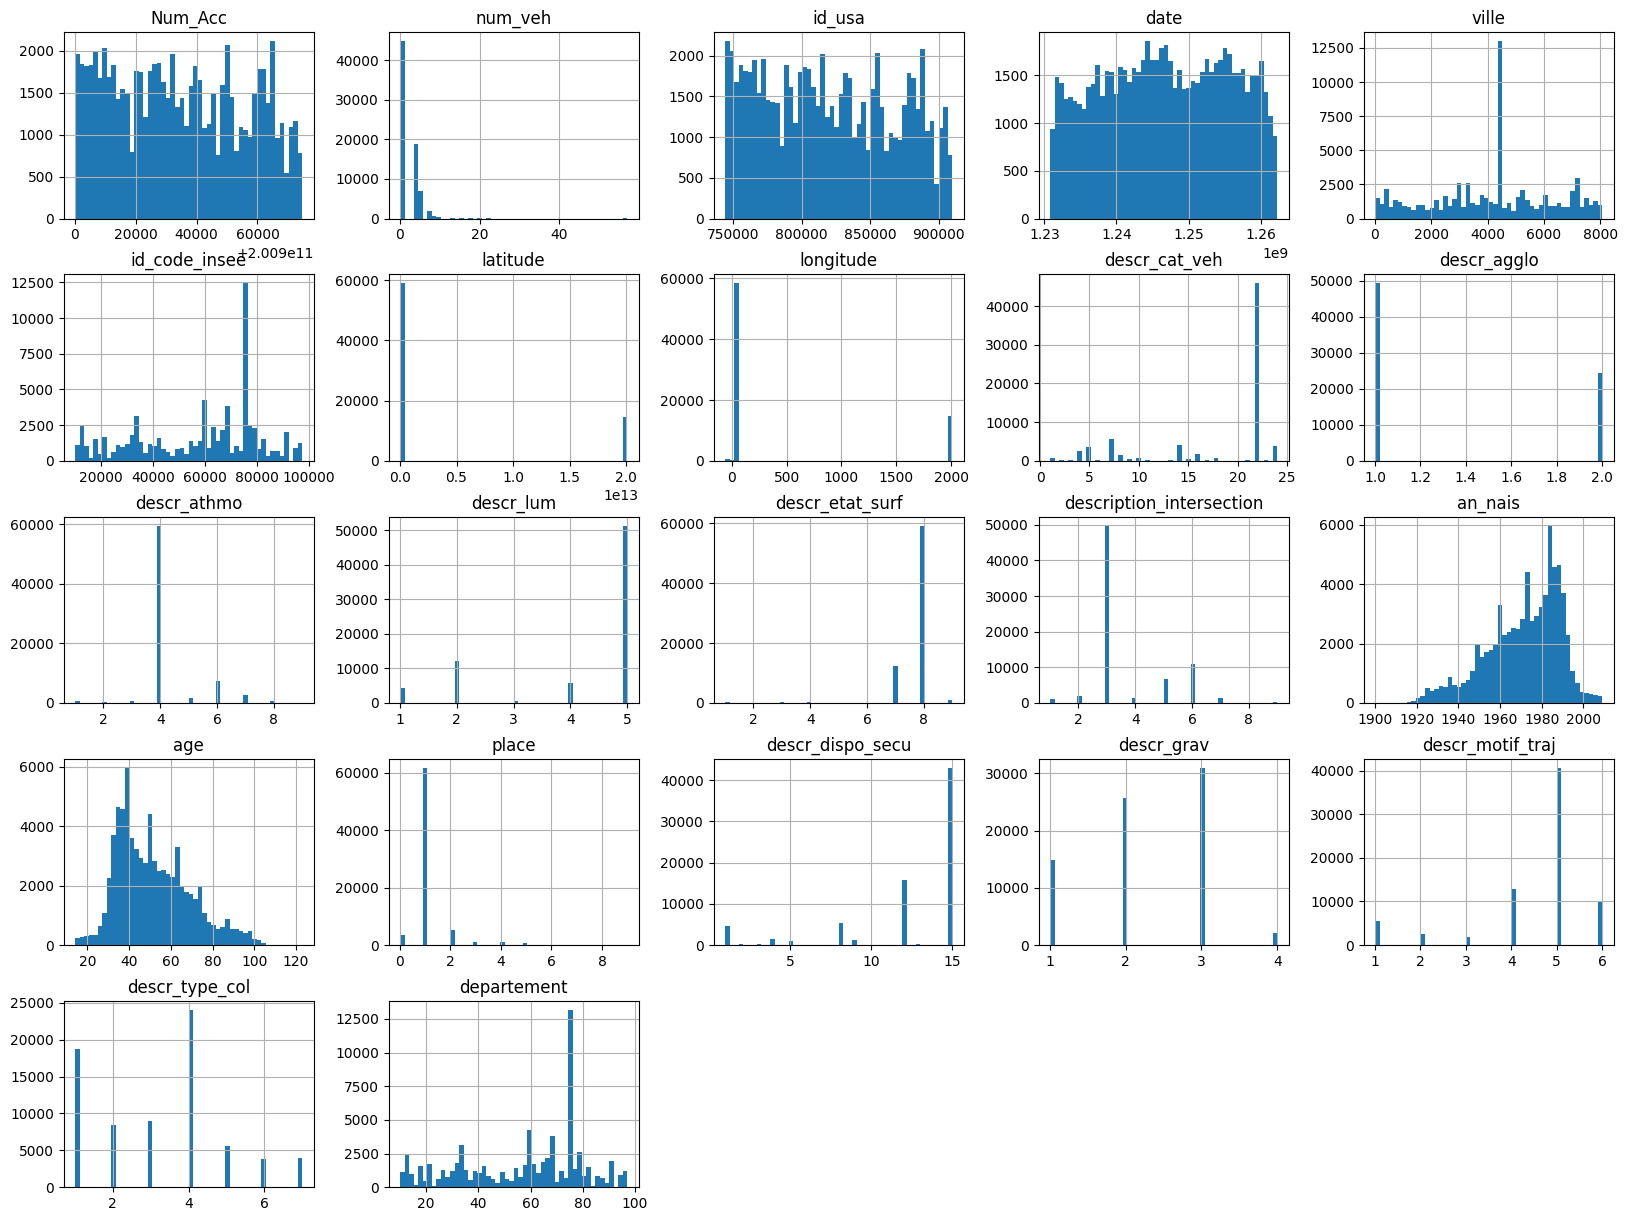

In [ ]:
print("FEATURES :")
print(data.info(show_counts=1))
print("NOMBRE D'INSTANCES PAR CLASSE (GRAVITE ACCIDENTS)")
print(data.value_counts(data.descr_grav))
print("STATISTIQUES SUR LES VARIABLES")
print(data.describe())
print("GRAPHIQUES DE VISUALISATION")
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

## Préparation des données

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import datetime

enc = OrdinalEncoder()

data_temp = data[["num_veh"]]
data.num_veh = enc.fit_transform(data_temp)

data_temp = data[["ville"]]
data.ville = enc.fit_transform(data_temp)

timestamps = pd.to_datetime(data['date']).astype(int)
data["date"] = timestamps

print(data.info(show_counts=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73643 entries, 0 to 73642
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_Acc                   73643 non-null  int64  
 1   num_veh                   73643 non-null  float64
 2   id_usa                    73643 non-null  int64  
 3   date                      73643 non-null  int64  
 4   ville                     73643 non-null  float64
 5   id_code_insee             73643 non-null  int64  
 6   latitude                  73643 non-null  float64
 7   longitude                 73643 non-null  float64
 8   descr_cat_veh             73643 non-null  int64  
 9   descr_agglo               73643 non-null  int64  
 10  descr_athmo               73643 non-null  int64  
 11  descr_lum                 73643 non-null  int64  
 12  descr_etat_surf           73643 non-null  int64  
 13  description_intersection  73643 non-null  int64  
 14  an_nai

# Apprentissage supervisé

## Importation des modules

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingClassifier

from joblib import dump, load

## Répartition des données

In [ ]:
features = data.drop("descr_grav", axis=1)
labels = data["descr_grav"].copy()

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Répartition des données à partir d'un jeu réduit

In [ ]:
data_reduced = data.sample(frac = 0.25)
features_reduced = data_reduced.drop("descr_grav", axis=1)
labels_reduced = data_reduced["descr_grav"].copy()

X_train_reduced, X_test_reduced, Y_train_reduced, Y_test_reduced = train_test_split(features_reduced, labels_reduced, test_size=0.2, random_state=42)

## Classification avec trois algorithmes de haut niveau

### Support Vector Machine (SVM)

SVC accuracy score  (without hyper parameter tuning) : 0.40727667662231876
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       749
           2       0.00      0.00      0.00      1317
           3       0.41      1.00      0.58      1500
           4       0.00      0.00      0.00       117

    accuracy                           0.41      3683
   macro avg       0.10      0.25      0.14      3683
weighted avg       0.17      0.41      0.24      3683



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


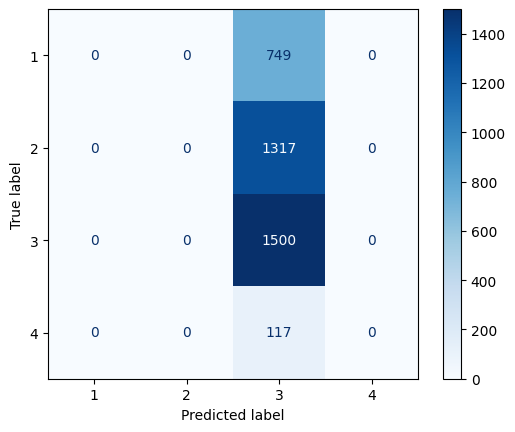

In [ ]:
# Train the Support Vector Classifier without hyper parameter tuning

# Train the model on train set
svc_model = SVC()
svc_model.fit(X_train_reduced, Y_train_reduced)

# Print prediction results
svc_pred = svc_model.predict(X_test_reduced)
print("SVC accuracy score  (without hyper parameter tuning) :", accuracy_score(Y_test_reduced, svc_pred))
print(classification_report(Y_test_reduced, svc_pred))
svc_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test_reduced, svc_pred), display_labels=svc_model.classes_)
svc_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Hyper parameter tuning

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

svc_grid = GridSearchCV(SVC(), param_grid, verbose = 3)

svc_grid.fit(X_train_reduced, Y_train_reduced)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.417 total time=  24.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.417 total time=  20.7s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.417 total time=  22.4s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.417 total time=  19.8s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.417 total time=  22.8s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.417 total time=  19.8s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.417 total time=  22.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.417 total time=  20.3s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.417 total time=  20.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.417 total time=  22.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.417 total time=  20.5s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [ ]:
# All results
means = svc_grid.cv_results_['mean_test_score']
stds = svc_grid.cv_results_['std_test_score']
for mean, std, params, rank in zip(means, stds, svc_grid.cv_results_['params'], svc_grid.cv_results_['rank_test_score']):
    print("Position : %d - Score : %0.6f (+/-%0.06f) for %r" % (rank, mean, std, params))
print("SVC : Best parameters :", svc_grid.best_params_)
print("SVC : Best estimator :", svc_grid.best_estimator_)

Position : 9 - Score : 0.417097 (+/-0.000097) for {'C': 0.1, 'gamma': 1}
Position : 9 - Score : 0.417097 (+/-0.000097) for {'C': 0.1, 'gamma': 0.1}
Position : 9 - Score : 0.417097 (+/-0.000097) for {'C': 0.1, 'gamma': 0.01}
Position : 9 - Score : 0.417097 (+/-0.000097) for {'C': 0.1, 'gamma': 0.001}
Position : 9 - Score : 0.417097 (+/-0.000097) for {'C': 1, 'gamma': 1}
Position : 4 - Score : 0.420627 (+/-0.001660) for {'C': 1, 'gamma': 0.1}
Position : 1 - Score : 0.422664 (+/-0.002091) for {'C': 1, 'gamma': 0.01}
Position : 15 - Score : 0.407183 (+/-0.002045) for {'C': 1, 'gamma': 0.001}
Position : 7 - Score : 0.417436 (+/-0.000490) for {'C': 10, 'gamma': 1}
Position : 2 - Score : 0.420967 (+/-0.001962) for {'C': 10, 'gamma': 0.1}
Position : 3 - Score : 0.420831 (+/-0.002132) for {'C': 10, 'gamma': 0.01}
Position : 16 - Score : 0.403517 (+/-0.003145) for {'C': 10, 'gamma': 0.001}
Position : 8 - Score : 0.417232 (+/-0.000363) for {'C': 100, 'gamma': 1}
Position : 5 - Score : 0.420356 (+

SVC accuracy score  (hyper parameter tuning) : 0.41542221015476516
              precision    recall  f1-score   support

           1       0.45      0.01      0.03       749
           2       0.57      0.04      0.07      1317
           3       0.41      0.98      0.58      1500
           4       0.50      0.01      0.02       117

    accuracy                           0.42      3683
   macro avg       0.48      0.26      0.17      3683
weighted avg       0.48      0.42      0.27      3683



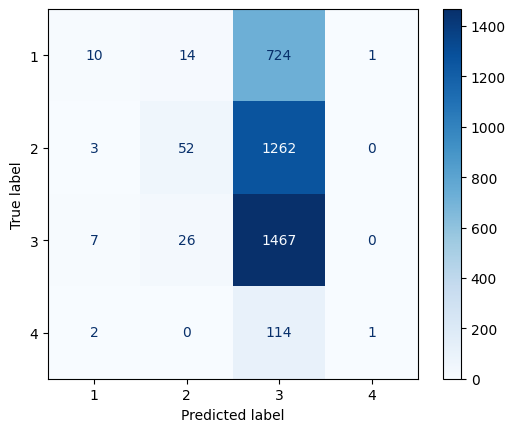

In [ ]:
best_svc_model = svc_grid.best_estimator_
best_svc_pred = best_svc_model.predict(X_test_reduced)

print("SVC accuracy score  (hyper parameter tuning) :", accuracy_score(Y_test_reduced, best_svc_pred))
print(classification_report(Y_test_reduced, best_svc_pred))
best_svc_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test_reduced, best_svc_pred), display_labels=best_svc_model.classes_)
best_svc_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
dump(best_svc_model,'svm.joblib')

### Random Forest

Random Forest accuracy score  (without hyper parameter tuning) : 0.6509606897956413
              precision    recall  f1-score   support

           1       0.54      0.47      0.50      2902
           2       0.65      0.58      0.61      5193
           3       0.69      0.84      0.76      6219
           4       0.29      0.02      0.03       415

    accuracy                           0.65     14729
   macro avg       0.54      0.48      0.48     14729
weighted avg       0.64      0.65      0.64     14729



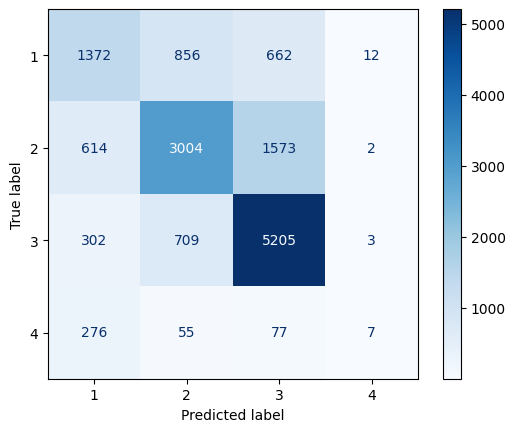

In [ ]:
# Train the Random Forest Classifier without hyper parameter tuning

# Train the model on train set
forest_model = RandomForestClassifier()
forest_model.fit(X_train, Y_train)

# Print prediction results
forest_pred = forest_model.predict(X_test)
print("Random Forest accuracy score  (without hyper parameter tuning) :", accuracy_score(Y_test, forest_pred))
print(classification_report(Y_test, forest_pred))
forest_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, forest_pred), display_labels=forest_model.classes_)
forest_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#  Hyper parameter tuning

param_grid = {
	'n_estimators': [25, 50, 100, 200, 500],
	'max_depth': [None, 10, 20, 30],
}

forest_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=3)
forest_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...max_depth=None, n_estimators=25;, score=0.634 total time=   4.3s
[CV 2/5] END ...max_depth=None, n_estimators=25;, score=0.627 total time=   3.7s
[CV 3/5] END ...max_depth=None, n_estimators=25;, score=0.631 total time=   3.3s
[CV 4/5] END ...max_depth=None, n_estimators=25;, score=0.625 total time=   3.4s
[CV 5/5] END ...max_depth=None, n_estimators=25;, score=0.629 total time=   4.5s
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.641 total time=   6.8s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.638 total time=   8.1s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.639 total time=   6.8s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.637 total time=   8.1s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.642 total time=   6.7s
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.646 total time=  14.9s
[CV 2/5] END ..max_depth=None, n_estimators=100

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [25, 50, 100, 200, 500]},
             verbose=3)

In [ ]:
# All results
means = forest_grid.cv_results_['mean_test_score']
stds = forest_grid.cv_results_['std_test_score']
for mean, std, params, rank in zip(means, stds, forest_grid.cv_results_['params'], forest_grid.cv_results_['rank_test_score']):
    print("Position : %d - Score : %0.6f (+/-%0.06f) for %r" % (rank, mean, std, params))
print("Random Forest : Best parameters :", forest_grid.best_params_)
print("Random Forest : Best estimator :", forest_grid.best_estimator_)

Position : 20 - Score : 0.629256 (+/-0.002825) for {'max_depth': None, 'n_estimators': 25}
Position : 12 - Score : 0.639220 (+/-0.001789) for {'max_depth': None, 'n_estimators': 50}
Position : 8 - Score : 0.643735 (+/-0.002220) for {'max_depth': None, 'n_estimators': 100}
Position : 6 - Score : 0.645415 (+/-0.001726) for {'max_depth': None, 'n_estimators': 200}
Position : 4 - Score : 0.646315 (+/-0.001636) for {'max_depth': None, 'n_estimators': 500}
Position : 17 - Score : 0.630818 (+/-0.003131) for {'max_depth': 10, 'n_estimators': 25}
Position : 19 - Score : 0.630376 (+/-0.004598) for {'max_depth': 10, 'n_estimators': 50}
Position : 16 - Score : 0.631157 (+/-0.003744) for {'max_depth': 10, 'n_estimators': 100}
Position : 15 - Score : 0.631870 (+/-0.003963) for {'max_depth': 10, 'n_estimators': 200}
Position : 14 - Score : 0.632125 (+/-0.003695) for {'max_depth': 10, 'n_estimators': 500}
Position : 13 - Score : 0.637064 (+/-0.004027) for {'max_depth': 20, 'n_estimators': 25}
Position

Random Forest accuracy score  (hyper parameter tuning) : 0.6604657478443886
              precision    recall  f1-score   support

           1       0.55      0.47      0.51      2902
           2       0.67      0.57      0.62      5193
           3       0.69      0.86      0.77      6219
           4       0.45      0.01      0.02       415

    accuracy                           0.66     14729
   macro avg       0.59      0.48      0.48     14729
weighted avg       0.65      0.66      0.64     14729



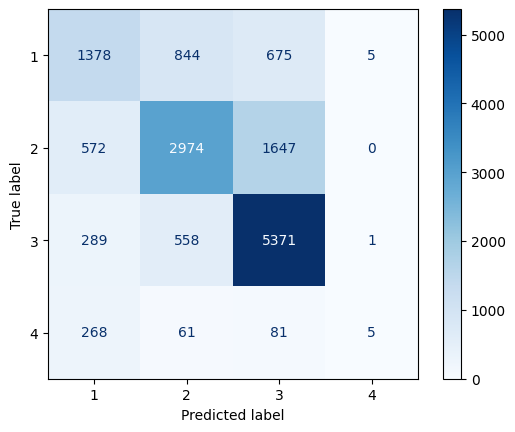

In [ ]:
best_forest_model = forest_grid.best_estimator_
best_forest_pred = best_forest_model.predict(X_test)

print("Random Forest accuracy score  (hyper parameter tuning) :", accuracy_score(Y_test, best_forest_pred))
print(classification_report(Y_test, best_forest_pred))
best_forest_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, best_forest_pred), display_labels=best_forest_model.classes_)
best_forest_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
dump(best_forest_model,'rf.joblib')

### Multilayer Perceptron (MLP)

MLP accuracy score  (without hyper parameter tuning) : 0.4222282571797135
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2902
           2       0.00      0.00      0.00      5193
           3       0.42      1.00      0.59      6219
           4       0.00      0.00      0.00       415

    accuracy                           0.42     14729
   macro avg       0.11      0.25      0.15     14729
weighted avg       0.18      0.42      0.25     14729



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


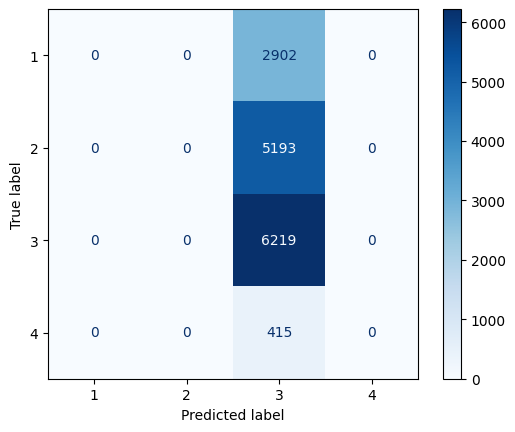

In [ ]:
# Train the MLP Classifier without hyper parameter tuning

# Train the model on train set
mlp_model = MLPClassifier()
mlp_model.fit(X_train, Y_train)

# Print prediction results
mlp_pred = mlp_model.predict(X_test)
print("MLP accuracy score  (without hyper parameter tuning) :", accuracy_score(Y_test, mlp_pred))
print(classification_report(Y_test, mlp_pred))
mlp_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, mlp_pred), display_labels=mlp_model.classes_)
mlp_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#  Hyper parameter tuning

param_grid = {
	  'hidden_layer_sizes': [(50,50),(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


mlp_grid = GridSearchCV(MLPClassifier(), param_grid=param_grid, verbose=3)
mlp_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.418 total time=  13.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.421 total time=  13.9s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.421 total time=  10.8s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.421 total time=  12.6s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd;, score=0.421 total time=   9.6s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam;, score=0.421 total time=  19.9s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=cons

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=3)

In [ ]:
# All results
means = mlp_grid.cv_results_['mean_test_score']
stds = mlp_grid.cv_results_['std_test_score']
for mean, std, params, rank in zip(means, stds, mlp_grid.cv_results_['params'], mlp_grid.cv_results_['rank_test_score']):
    print("Position : %d - Score : %0.6f (+/-%0.06f) for %r" % (rank, mean, std, params))
print("MLP : Best parameters :", mlp_grid.best_params_)
print("MLP : Best estimator :", mlp_grid.best_estimator_)

Position : 16 - Score : 0.420121 (+/-0.001158) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
Position : 19 - Score : 0.419272 (+/-0.002855) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Position : 2 - Score : 0.420698 (+/-0.000014) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Position : 16 - Score : 0.420121 (+/-0.001158) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Position : 16 - Score : 0.420121 (+/-0.001158) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Position : 24 - Score : 0.417643 (+/-0.006023) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solve

MLP accuracy score  (hyper parameter tuning) : 0.4222282571797135
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2902
           2       0.00      0.00      0.00      5193
           3       0.42      1.00      0.59      6219
           4       0.00      0.00      0.00       415

    accuracy                           0.42     14729
   macro avg       0.11      0.25      0.15     14729
weighted avg       0.18      0.42      0.25     14729



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


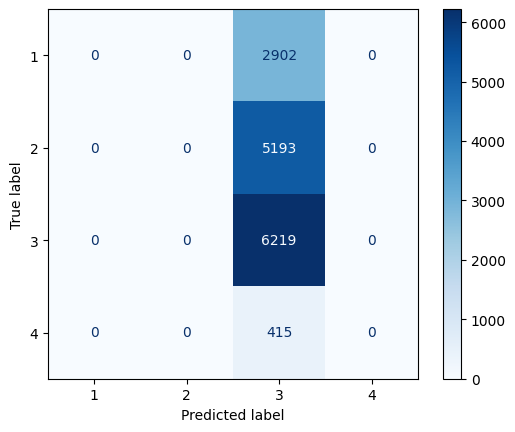

In [ ]:
best_mlp_model = mlp_grid.best_estimator_
best_mlp_pred = best_mlp_model.predict(X_test)

print("MLP accuracy score  (hyper parameter tuning) :", accuracy_score(Y_test, best_mlp_pred))
print(classification_report(Y_test, best_mlp_pred))
best_mlp_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, best_mlp_pred), display_labels=best_mlp_model.classes_)
best_mlp_confusion_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
dump(best_mlp_model,'mlp.joblib')

### Fusion des 3 classifieurs (vote majoritaire)

In [ ]:
# VOTING = HARD

# Optimal parameters
clf1 = SVC(C=1, gamma=0.01)
clf2 = RandomForestClassifier(max_depth=20, n_estimators=500)
clf3 = MLPClassifier(activation='tanh', alpha=0.05)

eclf1 = VotingClassifier(estimators=[('rf', clf2), ('svc', clf1), ('mlp', clf3)], voting='hard', verbose=True)
eclf1.fit(X_train, Y_train)
eclf1_pred = eclf1.predict(X_test)
print(eclf1_pred)

[Voting] ....................... (1 of 3) Processing rf, total= 1.3min
[Voting] ...................... (2 of 3) Processing svc, total=26.8min
[Voting] ...................... (3 of 3) Processing mlp, total=  11.6s
[3 3 2 ... 3 3 3]


In [ ]:
score = accuracy_score(Y_test, eclf1_pred)
print("Hard Voting Score :", score)

Hard Voting Score : 0.44354674451761833


In [ ]:
# VOTING = SOFT

# Optimal parameters
clf1 = SVC(C=1, gamma=0.01, probability=True) # True car sinon je peux pas faire predict
clf2 = RandomForestClassifier(max_depth=20, n_estimators=500)
clf3 = MLPClassifier(activation='tanh', alpha=0.05)

eclf1 = VotingClassifier(estimators=[('rf', clf2), ('svc', clf1), ('mlp', clf3)], voting='soft', verbose=True)
eclf1.fit(X_train, Y_train)
eclf1_pred = eclf1.predict(X_test)
print(eclf1_pred)

[Voting] ....................... (1 of 3) Processing rf, total= 1.3min
[Voting] ..................... (2 of 3) Processing svc, total=101.7min
[Voting] ...................... (3 of 3) Processing mlp, total=   9.1s
[2 3 2 ... 3 3 2]


In [ ]:
print(Y_test)

15482    2
29964    3
50882    2
55122    3
21598    3
        ..
53777    1
2898     2
14882    3
29222    3
61077    2
Name: descr_grav, Length: 14729, dtype: int64


In [ ]:
score = accuracy_score(Y_test, eclf1_pred)
print("Soft Voting Score :", score)

Soft Voting Score : 0.6318826804263697


# Script

In [ ]:
def main():

  import sys
  import pandas as pd
  from sklearn.cluster import KMeans
  import json

  from sklearn.svm import SVC
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.neural_network import MLPClassifier

  from joblib import dump, load


  # Test des arguments
  if sys.argv[2] != "SVM" and sys.argv[2] != "RF" and sys.argv[2] != "MLP":
      print('\nERROR : Le deuxième argument est la méthode de classification à utiliser parmi SVM, RF ou MLP\n')
      exit()

  if len(sys.argv) < 3 or len(sys.argv) > 3:
      print('\nERRROR:')
      print('Le premier argument est le nom d\'un fichier csv local qui répertorie les informations de l\'accident')
      print('Le deuxième argument est la méthode de classification à utiliser parmi SVM, RF ou MLP')
      exit()

  methode = sys.argv[2]
  # Récupération des arguments passés en commande
  data = pd.read_csv(sys.argv[1], sep=";", index_col=False)
  # Boucle pour lire chaque donnée du csv avec le bon indice
  #for i in data:
  #    print(i)
  #    for j in data[i]:
  #        print(j)


  if methode == "SVM":
      print("SVM method")
      svm = load('svm.joblib')
      gravite = svm.predict(data)

  if methode == "RF":
      print("RF method")
      rf = load('rf.joblib')
      gravite = rf.predict(data)

  if methode == "MLP":
      print("MLP method")
      mlp = load('mlp.joblib')
      gravite = mlp.predict(data)

  # Écriture du JSON
  dictionary = {
      "methode": methode,
      "informations": [
          {
              "desc_grav": data.descr_grav[0],
              "descr_athmo": data.descr_athmo[0],
              "num_acc": data.Num_Acc[0],
              "num_veh": data.num_veh[0],
              "id_usa": data.id_usa[0],
              "date": data.date[0],
              "ville": data.ville[0],
              "id_code_insee": data.id_code_insee[0],
              "latitude": data.latitude[0],
              "longitude": data.longitude[0],
              "descr_cat_veh": data.descr_cat_veh[0],
              "descr_agglo": data.descr_agglo[0],
              "descr_lum": data.descr_lum[0],
              "descr_etat_surf": data.descr_etat_surf[0],
              "description_intersection": data.description_intersection[0],
              "annee": data.an_nais[0],
              "age": data.age[0],
              "place": data.place[0],
              "descr_dispo_secu": data.descr_dispo_secu[0],
              "descr_motif_traj": data.descr_motif_traj[0],
              "descr_type_col": data.descr_type_col[0],
              "departement": data.departement[0]
          }
      ],
      "gravite": gravite
  }


  json_object = json.dumps(dictionary, indent=4)
  return json_object

In [ ]:
resultat = main()